In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных и первичный осмотр

In [2]:
# Загрузка данных
url = 'https://raw.githubusercontent.com/TatjanaYMIREA/aie-group-2/main/project/data/World-happiness_cor.csv'
df = pd.read_csv(url)

print("Первые строки датасета:")
print(df.head())

print("\nИнформация о столбцах и типах данных:")
print(df.info())

print("\nОписательные статистики:")
print(df.describe())

print("\nУникальные страны и годы:")
print(f"Количество уникальных стран: {df['Country name'].nunique()}")
print(f"Годы в датасете: {sorted(df['year'].unique())}")

Первые строки датасета:
  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2008        4.724               7.350           0.451   
3  Afghanistan  2009        3.402               7.509           0.552   
4  Afghanistan  2010        4.758               7.614           0.539   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              50.6                         0.718       0.164   
3                              60.8                         0.679       0.187   
4                              51.1                         0.600       0.118   

   Perceptions of corruption  Positive affect  Neg

Проверки качества данных

In [3]:
# Пропуски
print("Доля пропусков в каждом столбце:")
print(df.isna().mean())

# Дубликаты
print(f"\nКоличество полностью дублирующих строк: {len(df[df.duplicated(keep=False)])}")

# Подозрительные значения
print(f"Индекс счастья < 0: {len(df[df['Life Ladder'] < 0])}")
print(f"Индекс счастья > 10: {len(df[df['Life Ladder'] > 10])}")
print(f"Логарифм ВВП на душу населения < 0: {len(df[df['Log GDP per capita'] < 0])}")
print(f"Социальная поддержка < 0: {len(df[df['Social support'] < 0])}")
print(f"Социальная поддержка > 1: {len(df[df['Social support'] > 1])}")
print(f"Ожидаемая продолжительность здоровой жизни < 0: {len(df[df['Healthy life expectancy at birth'] < 0])}")
print(f"Восприятие коррупции < 0: {len(df[df['Perceptions of corruption'] < 0])}")
print(f"Восприятие коррупции > 1: {len(df[df['Perceptions of corruption'] > 1])}")

Доля пропусков в каждом столбце:
Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  0.011809
Social support                      0.005483
Healthy life expectancy at birth    0.026571
Freedom to make life choices        0.015183
Generosity                          0.034163
Perceptions of corruption           0.052720
Positive affect                     0.010122
Negative affect                     0.006748
dtype: float64

Количество полностью дублирующих строк: 0
Индекс счастья < 0: 0
Индекс счастья > 10: 0
Логарифм ВВП на душу населения < 0: 0
Социальная поддержка < 0: 0
Социальная поддержка > 1: 0
Ожидаемая продолжительность здоровой жизни < 0: 0
Восприятие коррупции < 0: 0
Восприятие коррупции > 1: 0


Визуализация данных

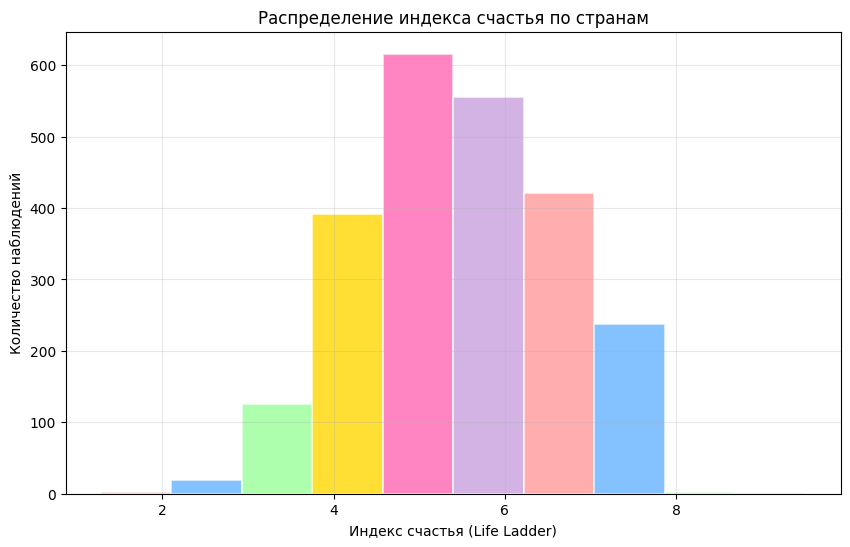


Группировка по уровням ВВП:


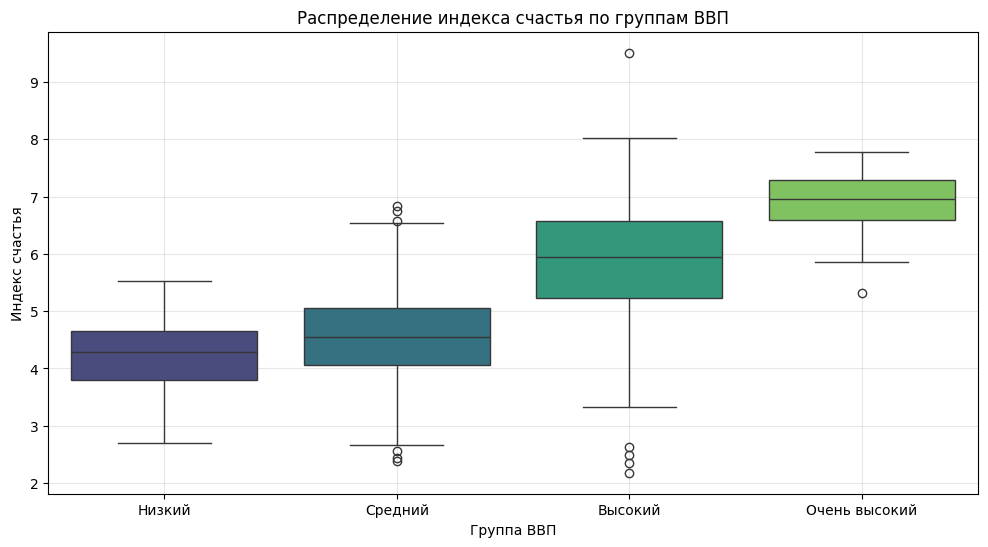

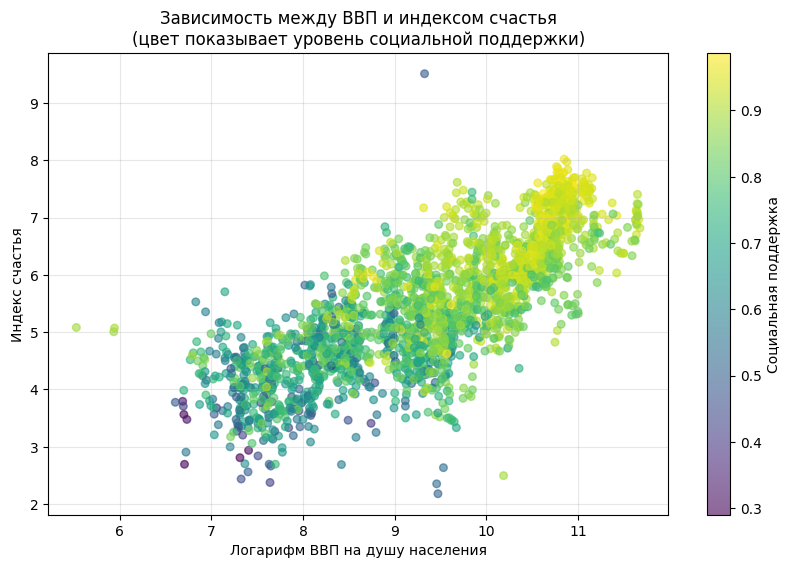

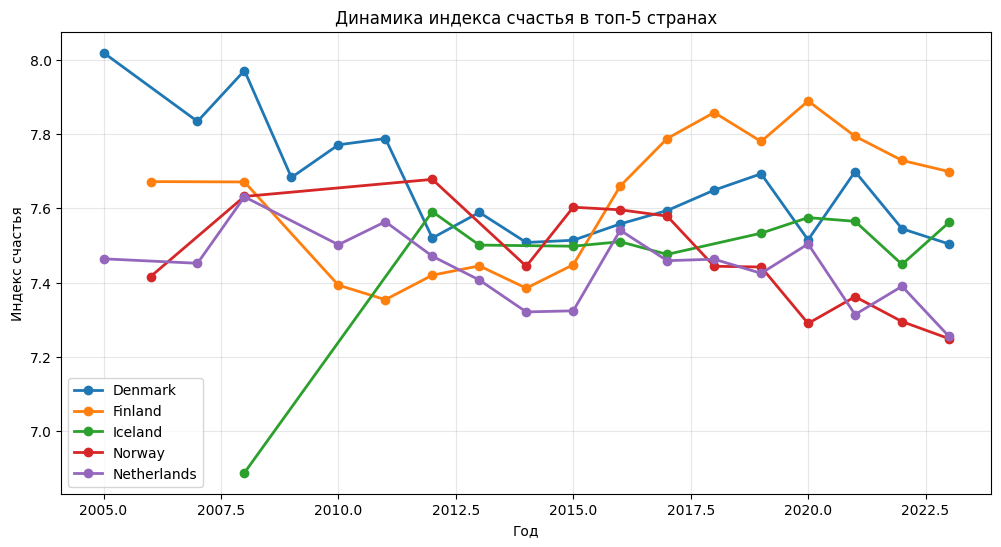

In [7]:
# 1. Гистограмма для Life Ladder
plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FF66B2', '#C9A0DC']
n, bins, patches = plt.hist(df['Life Ladder'].dropna(), bins=10, edgecolor='white', alpha=0.8, linewidth=1.2)
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i % len(colors)])
plt.xlabel('Индекс счастья (Life Ladder)')
plt.ylabel('Количество наблюдений')
plt.title('Распределение индекса счастья по странам')
plt.grid(True, alpha=0.3)
plt.savefig('happiness_distribution.png')
plt.show()

# 2. Боксплот счастья по группам ВВП
print("\nГруппировка по уровням ВВП:")
df['GDP_group'] = pd.cut(df['Log GDP per capita'],
    bins=[0, 7, 9, 11, 15],
    labels=['Низкий', 'Средний', 'Высокий', 'Очень высокий'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='GDP_group', y='Life Ladder', hue='GDP_group', legend=False, palette='viridis')
plt.xlabel('Группа ВВП')
plt.ylabel('Индекс счастья')
plt.title('Распределение индекса счастья по группам ВВП')
plt.grid(True, alpha=0.3)
plt.savefig('happiness_by_gdp_boxplot.png')
plt.show()

# 3. Диаграмма рассеяния: ВВП vs Счастье
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['Life Ladder'], alpha=0.6, c=df['Social support'],
           cmap='viridis', s=30)
plt.xlabel('Логарифм ВВП на душу населения')
plt.ylabel('Индекс счастья')
plt.title('Зависимость между ВВП и индексом счастья\n(цвет показывает уровень социальной поддержки)')
plt.colorbar(label='Социальная поддержка')
plt.grid(True, alpha=0.3)
plt.savefig('gdp_vs_happiness_scatter.png')
plt.show()

# 4. Тренд счастья по годам (для топ-5 стран)
plt.figure(figsize=(12, 6))
top_countries = df.groupby('Country name')['Life Ladder'].mean().nlargest(5).index
top_countries_data = df[df['Country name'].isin(top_countries)]

for country in top_countries:
    country_data = top_countries_data[top_countries_data['Country name'] == country]
    plt.plot(country_data['year'], country_data['Life Ladder'], marker='o', label=country, linewidth=2)

plt.xlabel('Год')
plt.ylabel('Индекс счастья')
plt.title('Динамика индекса счастья в топ-5 странах')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('happiness_trend_top_countries.png')
plt.show()

Краткие выводы:
1. Обнаруженные проблемы качества данных:
* В данных обнаружены незначительные пропуски (2-5%) в некоторых показателях, что характерно для международных статистических данных
* Полностью дублирующих строк не обнаружено, что свидетельствует о хорошей структурированности данных
* В данных отсутствуют явно подозрительные значения - все показатели находятся в ожидаемых диапазонах, что подтверждает надежность источника данных
2. Основные наблюдения:
* Данные охватывают множество стран за несколько лет, что позволяет анализировать различия  и временные тренды
* Наблюдается четкая зависимость между уровнем ВВП и субъективным благополучием населения, при этом страны с высоким ВВП стабильно показывают более высокие показатели счастья
* Показатели счастья остаются относительно стабильными в течение анализируемого периода, что свидетельствует об устойчивости факторов благополучия